In [1]:
import torchvision
import torchvision.transforms as transforms
import os
from matplotlib import pyplot as plt
import pickle
import numpy as np
from noise import noise_data, recover_image
noise_func = noise_data(noise_type="gauss")

transform_test = transforms.Compose([
    # transforms.RandomCrop(32, padding=4),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    # correct the normalization by https://github.com/kuangliu/pytorch-cifar/issues/19
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    noise_func,
    # transforms.ToTensor(),
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=False,
    download=True, transform=transform_test)

Files already downloaded and verified


In [2]:
trainset[0][0].shape

torch.Size([3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


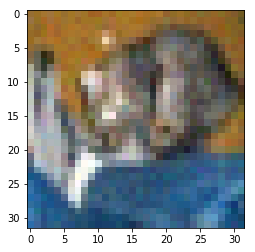

In [3]:
ori_data = trainset[0][0]
recovered_data = recover_image(ori_data)
plt.imshow(recovered_data.numpy().transpose(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


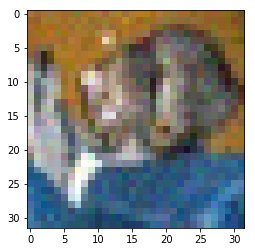

In [4]:
noise_func = noise_data(noise_type="gauss")
noisy_data = noise_func(trainset[0][0])
noisy_image = recover_image(noisy_data)
plt.imshow(noisy_image.numpy().transpose(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


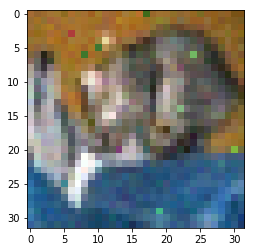

In [5]:
noise_func = noise_data(noise_type="s&p")
noisy_data = noise_func(trainset[0][0])
noisy_image = recover_image(noisy_data)
plt.imshow(noisy_image.numpy().transpose(1, 2, 0))

In [6]:
noise_func = noise_data(noise_type="speckle")
noisy_data = noise_func(trainset[0][0])
noisy_image = recover_image(noisy_data)
plt.imshow(noisy_image.numpy().transpose(1, 2, 0))

vals:3072
vals:4096.0


ValueError: lam < 0

In [ ]:
trainset[0][1]

In [ ]:
path = os.path.join('./data/', 'cifar-10-batches-py', 'batches.meta')

with open(path, 'rb') as infile:
    data = pickle.load(infile, encoding='latin1')
data['label_names']